<a href="https://colab.research.google.com/github/fedhere/MLTSA1_FBianco/blob/master/HW1/HW1ExtraCredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLTSA1 UDel PHYS667 Sprint 2020

HW1 Extra Credit :

Solve Exercise 1, 2, 3 from https://arxiv.org/pdf/1008.4686.pdf

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Exercise 1:** Using the standard linear algebra method of this Section, fit the straight line y = mx + b to the x, y, and $\sigma_y$ values for data points 5 through 20 in Table 1 on page 6. That is, ignore the first four data points, and also ignore the columns for $\sigma_x$ and $\rho_{xy}$. Make a plot showing the points, their uncertainties, and the best-fit line. Your plot should end up looking like Figure 1. What is the standard uncertainty variance $\sigma^2_m$ on the slope of the line?

In [7]:
#Data
x = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146], dtype = float)
y = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344], dtype = float)

sigma_y = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22], dtype = float)
sigma_x = np.array([9, 4, 11, 7, 5, 9, 4, 4, 11, 7, 5, 5, 5, 6, 6, 5, 9, 8, 6, 5], dtype = float)
rho_xy = np.array([-0.84, 0.31, 0.64, -0.27, -0.33, 0.67, -0.02, -0.05, -0.84, -0.69, 0.30, -0.46, -0.03, 0.50, 0.73, -0.52, 0.90, 0.40, -0.78, -0.56], dtype = float)


$$f(x)=m x+b$$
Solve the equation:
$$
\left[\begin{array}{l}
{\mathrm{b}} \\
{\mathrm{m}}
\end{array}\right]=\boldsymbol{X}=\left[\boldsymbol{A}^{\top} \boldsymbol{C}^{-1} \boldsymbol{A}\right]^{-1}\left[\boldsymbol{A}^{\top} \boldsymbol{C}^{-1} \boldsymbol{Y}\right]
$$

Covariance matrix:

$$
\rm{Cov} = \left[\begin{array}{cc}
{\boldsymbol{A}^{\top} \boldsymbol{C}^{-1} \boldsymbol{A}}
\end{array}\right]^{-1}
$$

In [111]:
from numpy.linalg import inv

A1 = np.c_[np.ones(len(x[4:])), x[4:]]
C1 = np.diag(sigma_y[4:]**2)

theta_best = inv(A1.T.dot(inv(C1)).dot(A1)).dot(A1.T.dot(inv(C1)).dot(y[4:]))

cov_matrix = inv(A1.T.dot(inv(C1)).dot(A1))
uncs = np.sqrt(np.diagonal(cov_matrix))

b, m = theta_best
unc_b, unc_m = uncs

print('The parameters and their uncertainties are:')
print(' b = {:.4f};  m = {:.4f}'.format(*theta_best))
print('Δb = {:.4f}; Δm = {:.4f}'.format(*uncs))

The parameters and their uncertainties are:
 b = 34.0477;  m = 2.2399
Δb = 18.2462; Δm = 0.1078


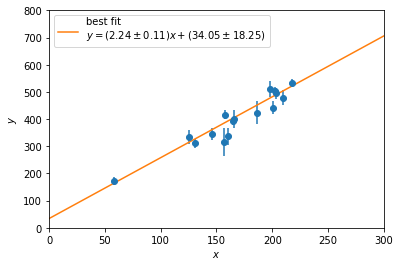

In [112]:
plt.errorbar(x[4:],y[4:], yerr = sigma_y[4:], fmt ='o', linestyle = "")

xx = np.linspace(0,300,100)
yy = m*xx + b
plt.plot(xx,yy, label = 'best fit \n$y = ({:.2f}\pm{:.2f})x + ({:.2f} \pm {:.2f})$'.format(m,unc_m,b,unc_b))

plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xlim(0, 300)
plt.ylim(0, 800);

**Exercise 2:** Repeat Exercise 1 but for all the data points in Table 1 on page 6. Your plot should end up looking like Figure 2. What is the standard uncertainty variance  m2 on the slope of the line? Is there anything you don’t like about the result? Is there anything di↵erent about the new points you have included beyond those used in Exercise 1?

In [107]:
A2 = np.c_[np.ones(len(x)), x]
C2 = np.diag(sigma_y**2)

theta_best = inv(A2.T.dot(inv(C2)).dot(A2)).dot(A2.T.dot(inv(C2)).dot(y))

cov_matrix = inv(A2.T.dot(inv(C2)).dot(A2))
uncs = np.sqrt(np.diagonal(cov_matrix))

b, m = theta_best
unc_b, unc_m = uncs

print('The parameters and their uncertainties are:')
print(' b = {:.4f};  m = {:.4f}'.format(*theta_best))
print('Δb = {:.4f}; Δm = {:.4f}'.format(*uncs))

The parameters and their uncertainties are:
 b = 213.2735;  m = 1.0767
Δb = 14.3940; Δm = 0.0774


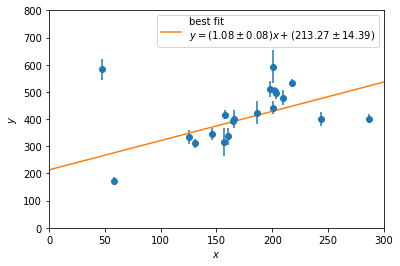

In [109]:
plt.errorbar(x,y, yerr = sigma_y, fmt ='o', linestyle = "")

xx = np.linspace(0,300,100)
yy = m*xx + b
plt.plot(xx,yy, label = 'best fit \n$y = ({:.2f}\pm{:.2f})x + ({:.2f} \pm {:.2f})$'.format(m,unc_m,b,unc_b))

plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xlim(0, 300)
plt.ylim(0, 800);

**Exercise 3:** Generalize the method of this Section to fit a general quadratic (second order) relationship. A1dd another column to matrix A1 containing the values $x^2_i$ , and another element to vector X (call it q). Then re-do Exercise 1 but fitting for and plotting the best quadratic relationship: $g(x)=qx^2 +mx+b$ .

In [115]:
A3 = np.c_[np.ones(len(x[4:])), x[4:], x[4:]**2]
C3 = C1

theta_best3 = inv(A3.T.dot(inv(C3)).dot(A3)).dot(A3.T.dot(inv(C3)).dot(y[4:]))

cov_matrix = inv(A3.T.dot(inv(C3)).dot(A3))
uncs3 = np.sqrt(np.diagonal(cov_matrix))

b, m, q = theta_best3
unc_b, unc_m, unc_q = uncs3

print('The parameters and their uncertainties are:')
print(' b = {:.4f};  m = {:.4f};  q = {:.4f}'.format(*theta_best3))
print('Δb = {:.4f}; Δm = {:.4f}; Δq = {:.4f}'.format(*uncs3))

The parameters and their uncertainties are:
 b = 72.8946;  m = 1.5961;  q = 0.0023
Δb = 38.9116; Δm = 0.5797; Δq = 0.0020


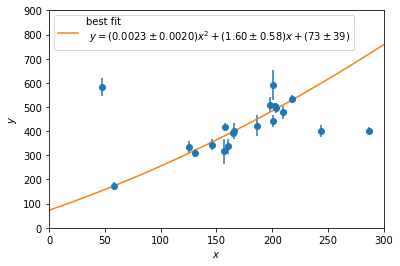

In [121]:
plt.errorbar(x,y, yerr = sigma_y, fmt ='o', linestyle = "")

xx = np.linspace(0,300,100)
yy = q*xx**2+m*xx + b
plt.plot(xx,yy, label = 'best fit \
         \n $y = ({:.4f}\pm{:.4f})x^2 + ({:.2f}\pm{:.2f})x + ({:.0f} \pm {:.0f})$'.format(q,unc_q,m,unc_m,b,unc_b))

plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xlim(0, 300)
plt.ylim(0, 900);